In [1]:
import pandas as pd

In [2]:
#importar el data.csv y separarlo por ;
#separador ; y codificacion utf-8
df = pd.read_csv('data.csv', sep=';')
#imprimir el data.csv
print(df)
#imprimir la cantidad de filas y columnas
print(df.shape)



      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance  Previous qualification  \
0                              1                       1   
1                              1                   

In [3]:
#ver la información del csv, tipos de datos, datos vacios, etc.
print(df.info())
#ver la cantidad de datos nulos por columna
print(df.isnull().sum())
#ver la cantidad de datos nulos por fila
print(df.isnull().sum(axis=1))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
total_columnas = df.shape[1]

for i, nulos in enumerate(df.isnull().sum(axis=1)):
    if nulos > 0:
        print(f"La fila {i} tiene {nulos} datos vacíos de un total de {total_columnas}")
    elif nulos==0:
        print(f"La fila {i} no tiene datos vacíos de un total de {total_columnas}")



La fila 0 no tiene datos vacíos de un total de 37
La fila 1 no tiene datos vacíos de un total de 37
La fila 2 no tiene datos vacíos de un total de 37
La fila 3 no tiene datos vacíos de un total de 37
La fila 4 no tiene datos vacíos de un total de 37
La fila 5 no tiene datos vacíos de un total de 37
La fila 6 no tiene datos vacíos de un total de 37
La fila 7 no tiene datos vacíos de un total de 37
La fila 8 no tiene datos vacíos de un total de 37
La fila 9 no tiene datos vacíos de un total de 37
La fila 10 no tiene datos vacíos de un total de 37
La fila 11 no tiene datos vacíos de un total de 37
La fila 12 no tiene datos vacíos de un total de 37
La fila 13 no tiene datos vacíos de un total de 37
La fila 14 no tiene datos vacíos de un total de 37
La fila 15 no tiene datos vacíos de un total de 37
La fila 16 no tiene datos vacíos de un total de 37
La fila 17 no tiene datos vacíos de un total de 37
La fila 18 no tiene datos vacíos de un total de 37
La fila 19 no tiene datos vacíos de un to

In [5]:
duplicados_todos = df[df.duplicated(keep=False)]
print("Todas las filas que están duplicadas (incluyendo la primera aparición):")
print(duplicados_todos)
print(f"Hay {df.duplicated().sum()} filas duplicadas (sin contar la primera aparición).")


Todas las filas que están duplicadas (incluyendo la primera aparición):
Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime/evening attendance, Previous qualification, Previous qualification (grade), Nacionality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Admission grade, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Unemployment rate, Inflation rate, GDP

In [6]:
# Detectar datos atípicos usando IQR para cada columna numérica
for columna in df.select_dtypes(include=['number']).columns:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    print(f"Columna '{columna}': {len(outliers)} datos atípicos")


Columna 'Marital status': 505 datos atípicos
Columna 'Application mode': 0 datos atípicos
Columna 'Application order': 541 datos atípicos
Columna 'Course': 442 datos atípicos
Columna 'Daytime/evening attendance': 483 datos atípicos
Columna 'Previous qualification': 707 datos atípicos
Columna 'Previous qualification (grade)': 179 datos atípicos
Columna 'Nacionality': 110 datos atípicos
Columna 'Mother's qualification': 0 datos atípicos
Columna 'Father's qualification': 0 datos atípicos
Columna 'Mother's occupation': 182 datos atípicos
Columna 'Father's occupation': 177 datos atípicos
Columna 'Admission grade': 86 datos atípicos
Columna 'Displaced': 0 datos atípicos
Columna 'Educational special needs': 51 datos atípicos
Columna 'Debtor': 503 datos atípicos
Columna 'Tuition fees up to date': 528 datos atípicos
Columna 'Gender': 0 datos atípicos
Columna 'Scholarship holder': 1099 datos atípicos
Columna 'Age at enrollment': 441 datos atípicos
Columna 'International': 110 datos atípicos
Colu

In [7]:
#errores de tipo de dato
print(df.dtypes)  # Revisar tipos
# Intentar convertir columnas numéricas (detecta si hay texto)
for col in df.select_dtypes(include='object'):
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass  # Columnas con texto real seguirán como object


Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [8]:
#valores faltantes
print(df.isnull().sum())


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [9]:

#detectar datos atípicos

# Lista de variables numéricas importantes
variables = [
    'Previous qualification (grade)', 'Admission grade',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
    'Unemployment rate', 'Inflation rate', 'GDP',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (without evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (credited)',
    'Age at enrollment'
]

# Filtrar el DataFrame para incluir solo las variables de interés
df_filtered = df[variables]
# Detectar datos atípicos usando IQR para cada variable
for col in df_filtered.select_dtypes(include='number'):
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_filtered[(df_filtered[col] < lower_bound) | (df_filtered[col] > upper_bound)]
    print(f"Variable '{col}': {len(outliers)} datos atípicos")


Variable 'Previous qualification (grade)': 179 datos atípicos
Variable 'Admission grade': 86 datos atípicos
Variable 'Curricular units 1st sem (grade)': 726 datos atípicos
Variable 'Curricular units 2nd sem (grade)': 877 datos atípicos
Variable 'Unemployment rate': 0 datos atípicos
Variable 'Inflation rate': 0 datos atípicos
Variable 'GDP': 0 datos atípicos
Variable 'Curricular units 1st sem (without evaluations)': 294 datos atípicos
Variable 'Curricular units 1st sem (evaluations)': 158 datos atípicos
Variable 'Curricular units 2nd sem (credited)': 530 datos atípicos
Variable 'Curricular units 2nd sem (enrolled)': 369 datos atípicos
Variable 'Curricular units 2nd sem (evaluations)': 109 datos atípicos
Variable 'Curricular units 2nd sem (approved)': 44 datos atípicos
Variable 'Curricular units 2nd sem (without evaluations)': 282 datos atípicos
Variable 'Curricular units 1st sem (approved)': 180 datos atípicos
Variable 'Curricular units 1st sem (enrolled)': 424 datos atípicos
Variable '

## Visualización de las distribuciones


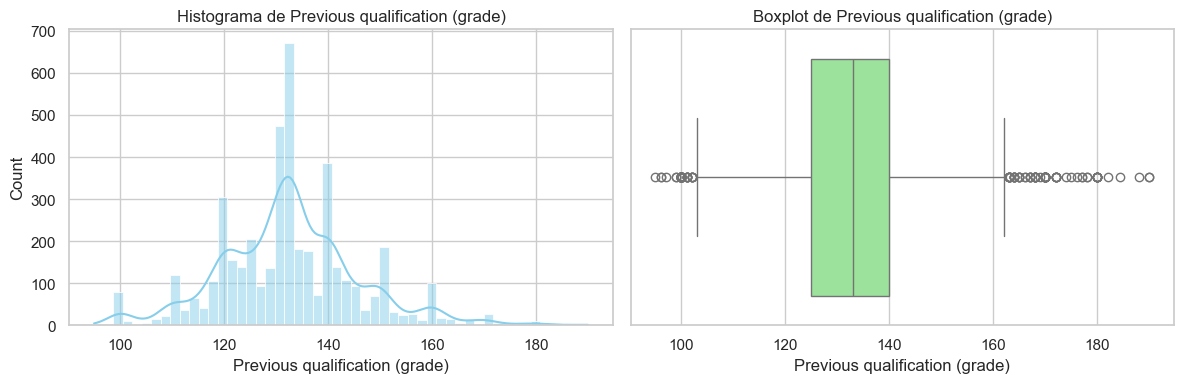

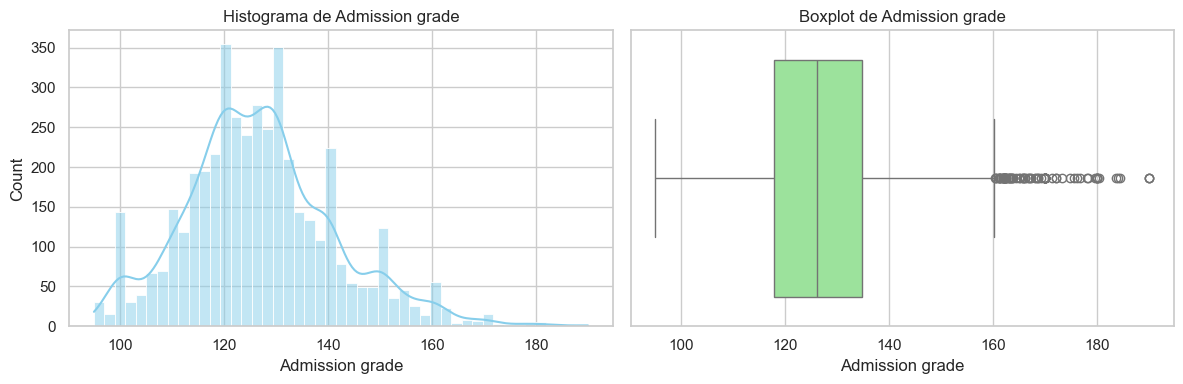

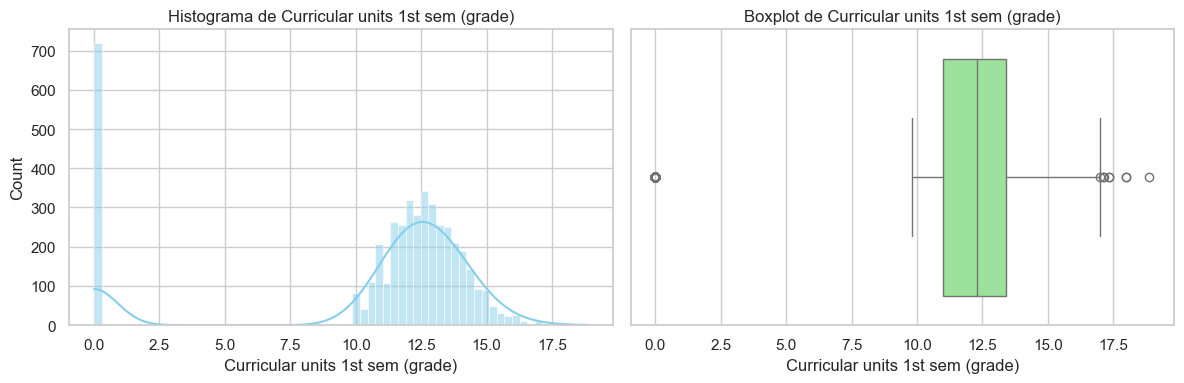

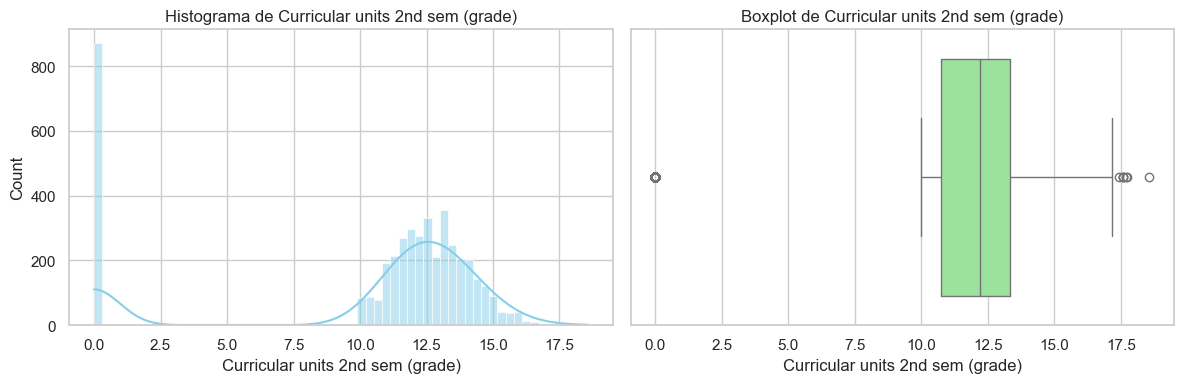

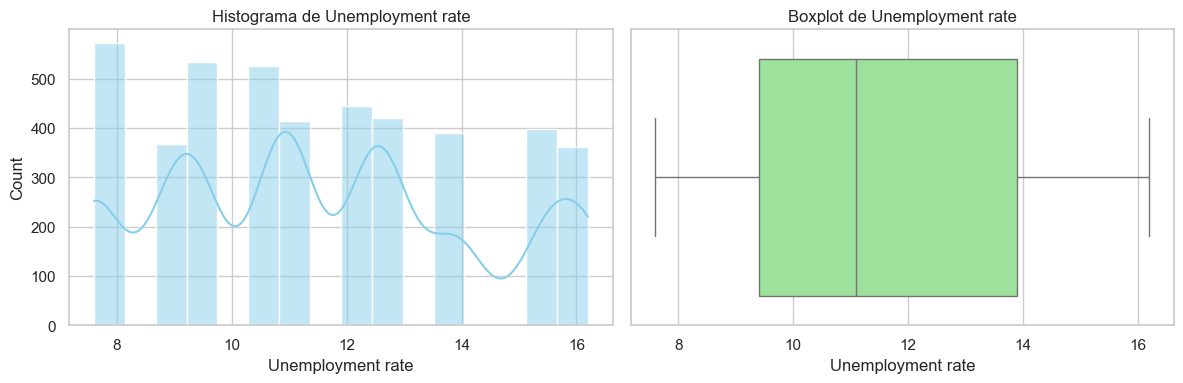

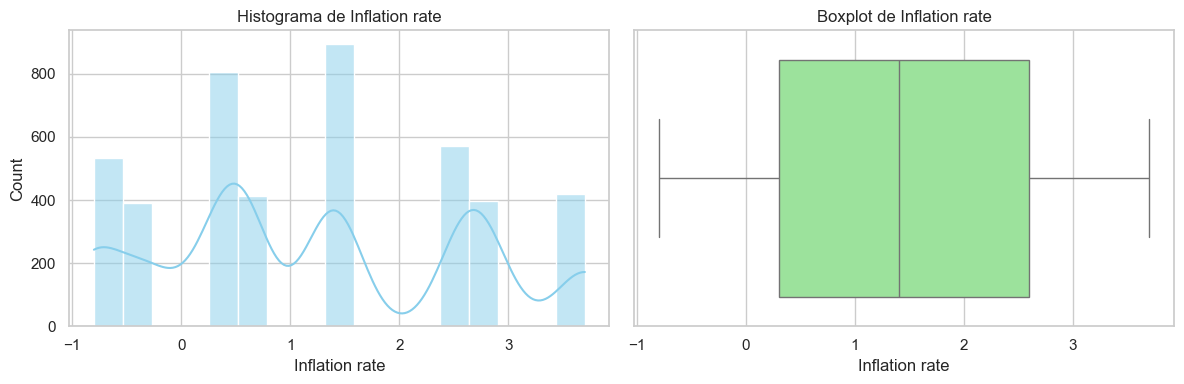

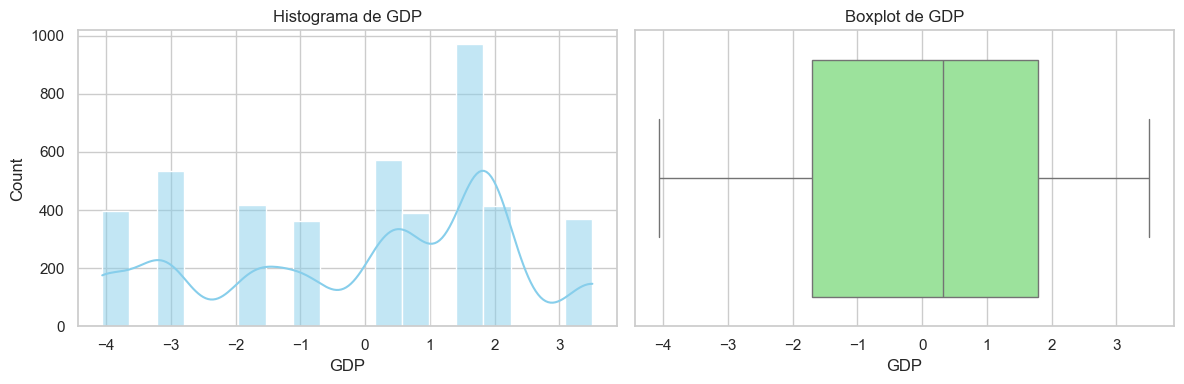

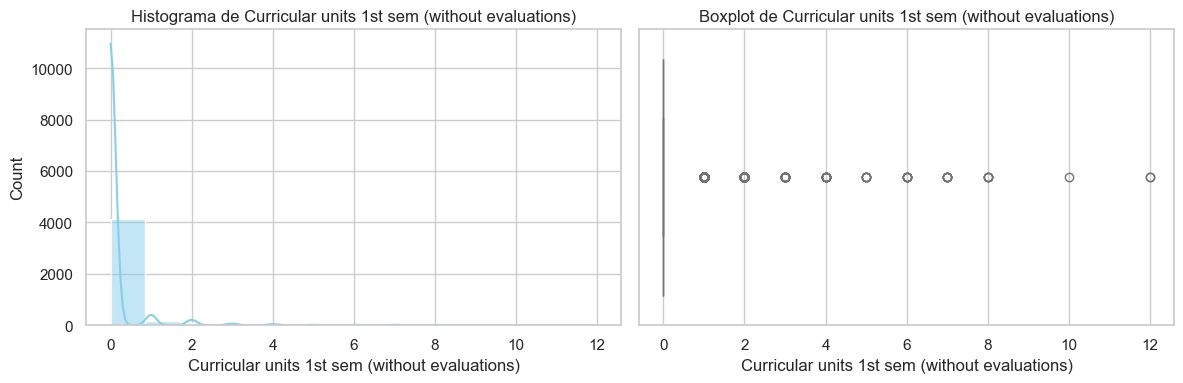

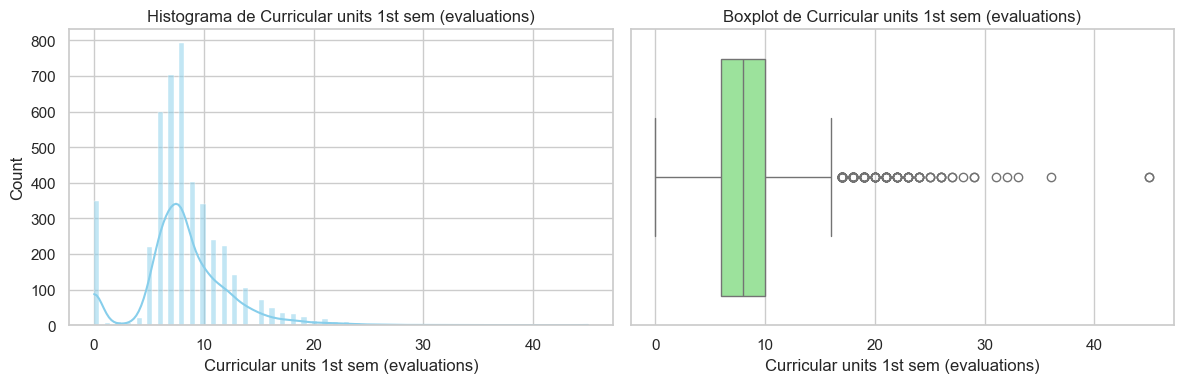

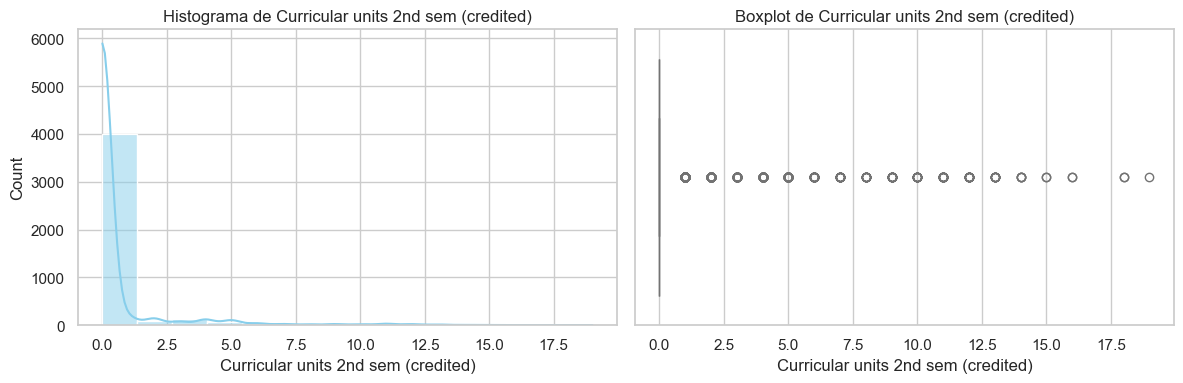

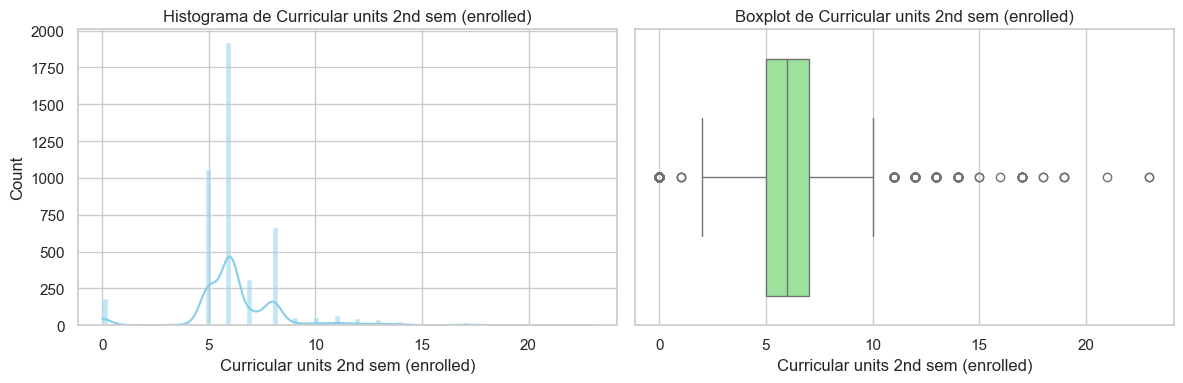

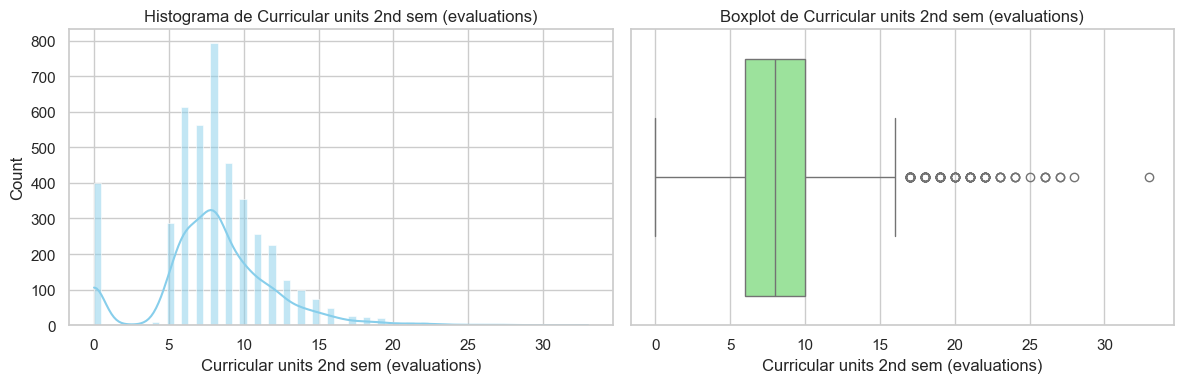

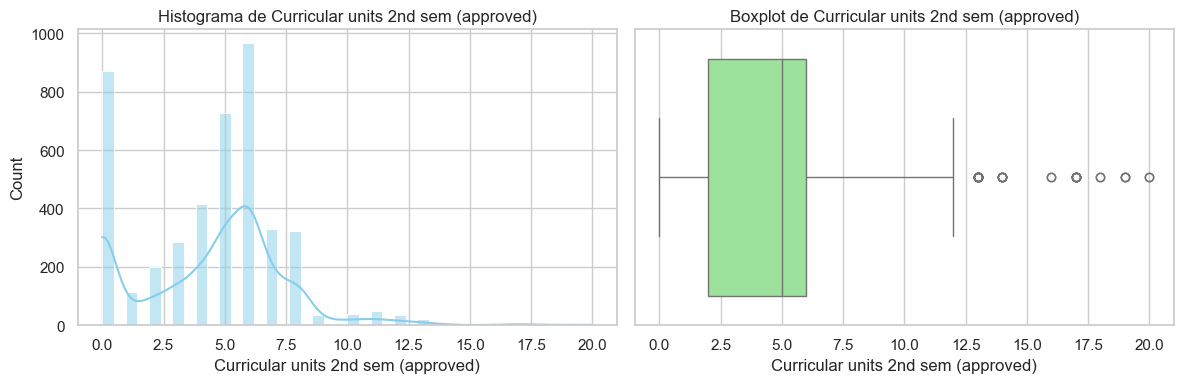

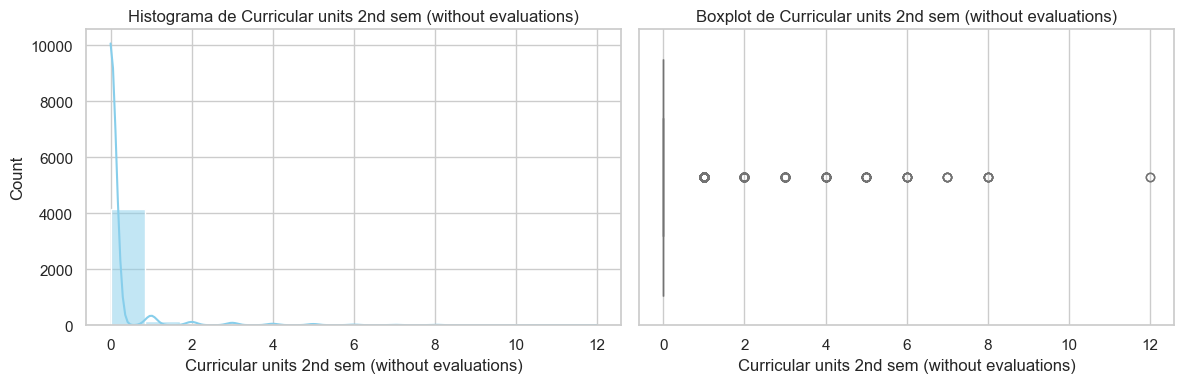

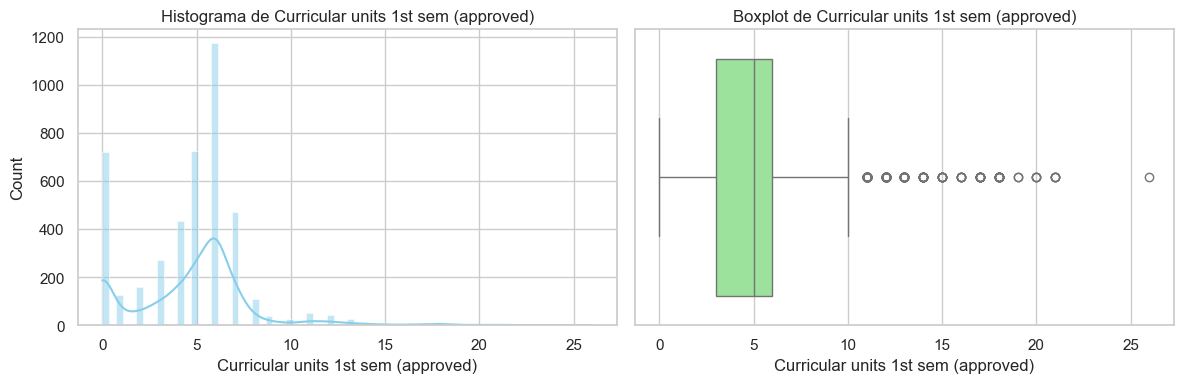

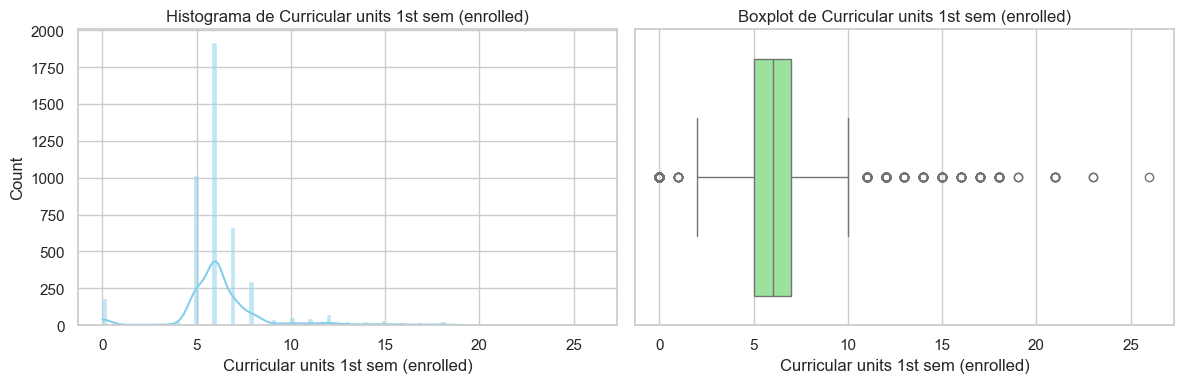

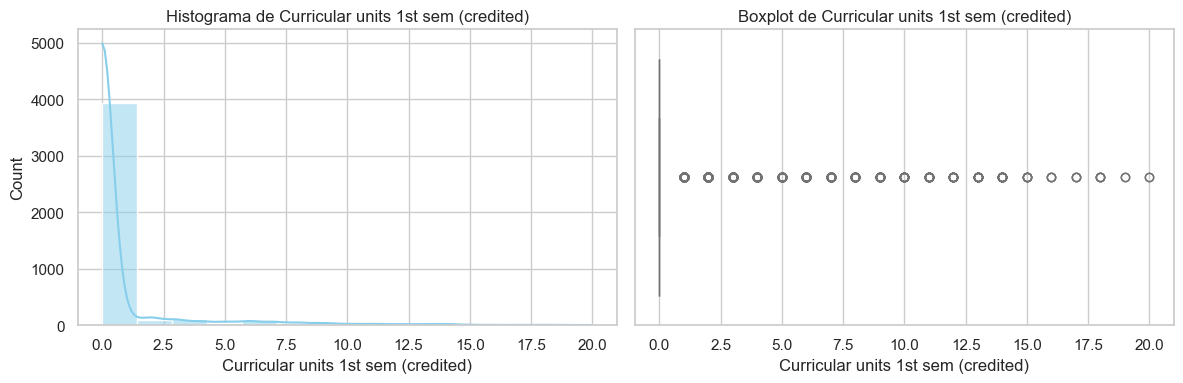

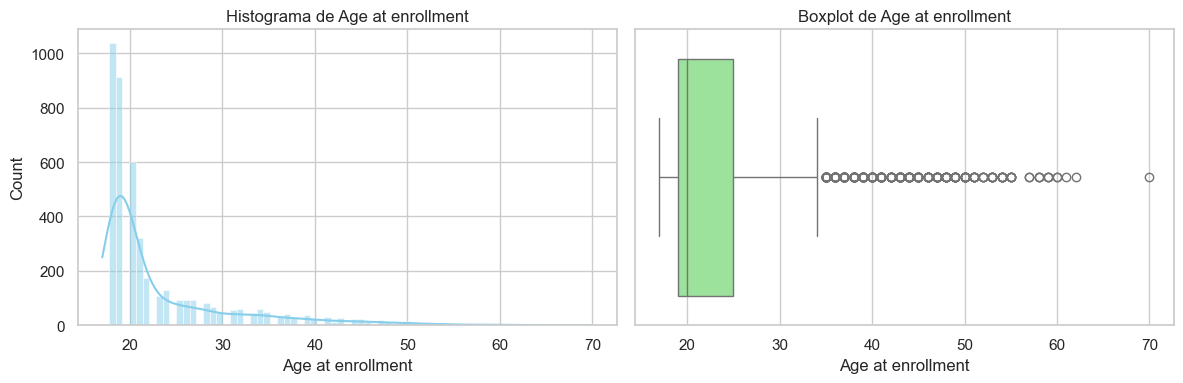

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables numéricas importantes
variables = [
    'Previous qualification (grade)', 'Admission grade',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
    'Unemployment rate', 'Inflation rate', 'GDP',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (without evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (credited)',
    'Age at enrollment'
]

# Configuración de estilo
sns.set(style="whitegrid")

# Plot individual por variable
for var in variables:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histograma
    sns.histplot(df[var], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histograma de {var}')
    
    # Boxplot
    sns.boxplot(x=df[var], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot de {var}')
    
    plt.tight_layout()
    plt.show()


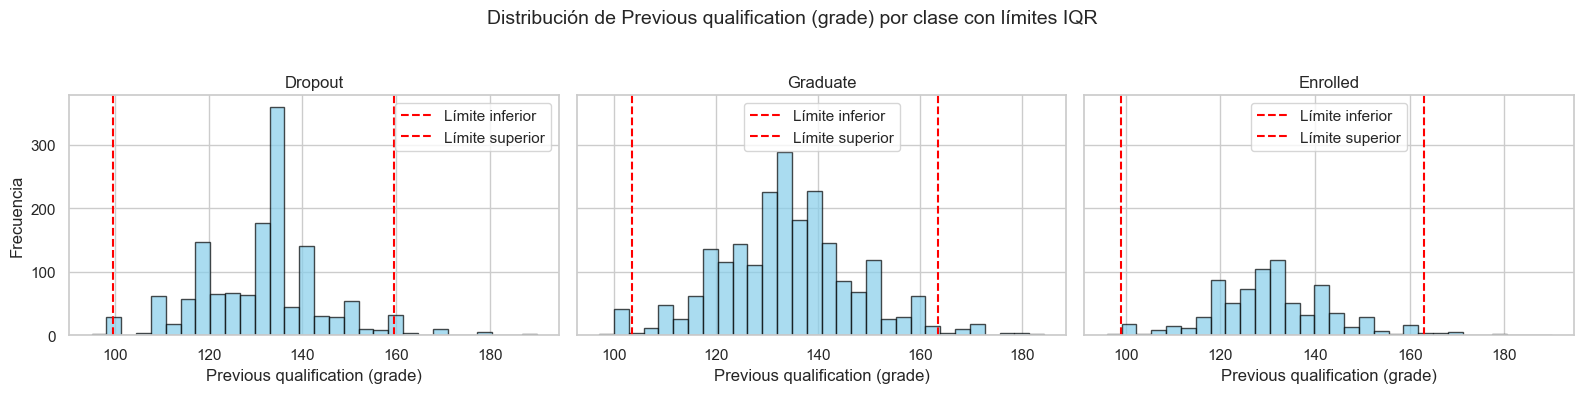

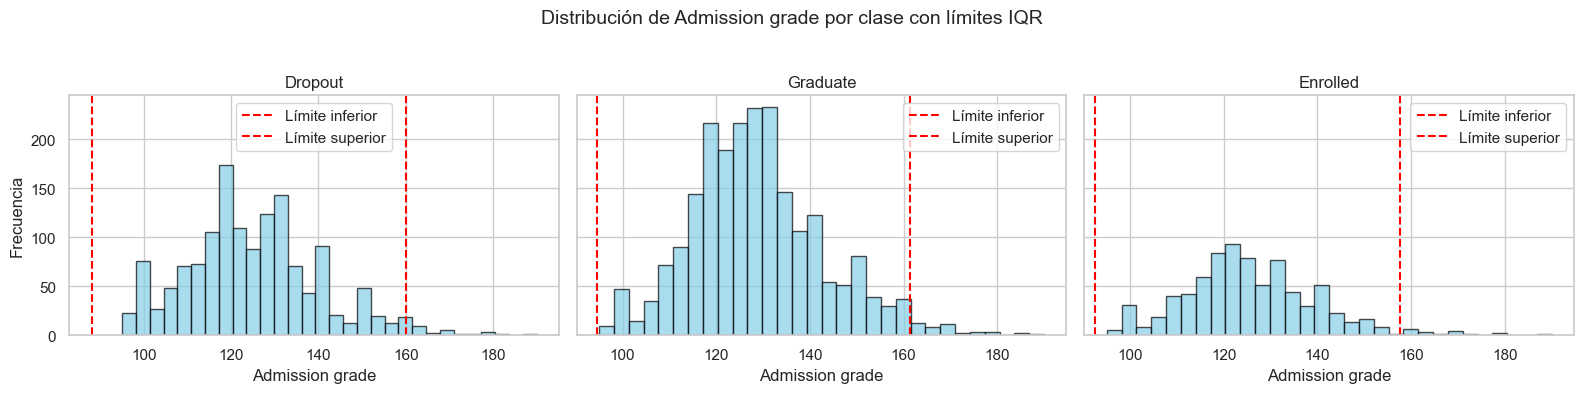

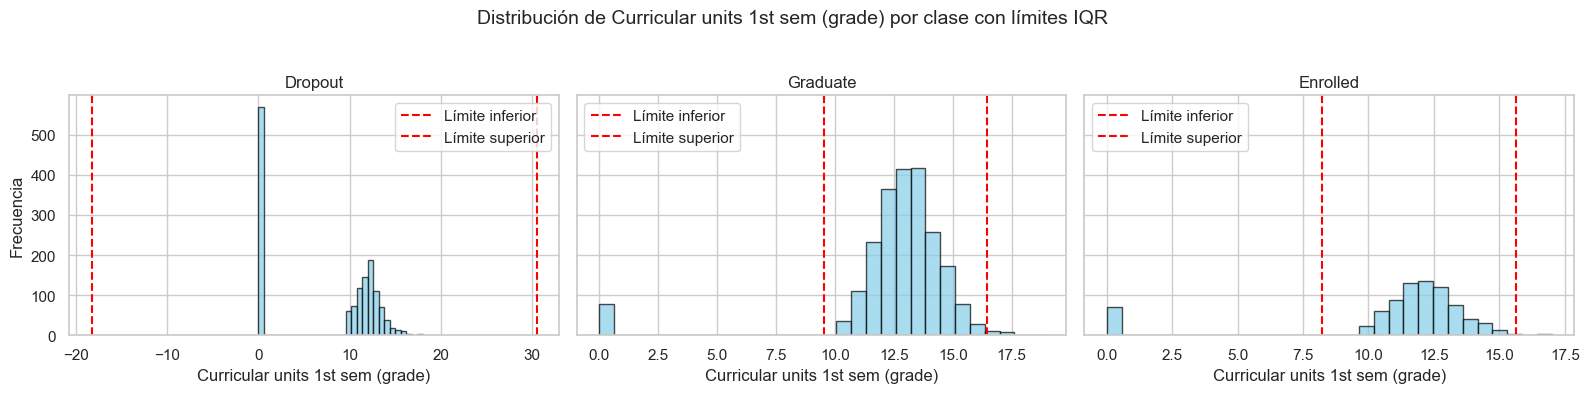

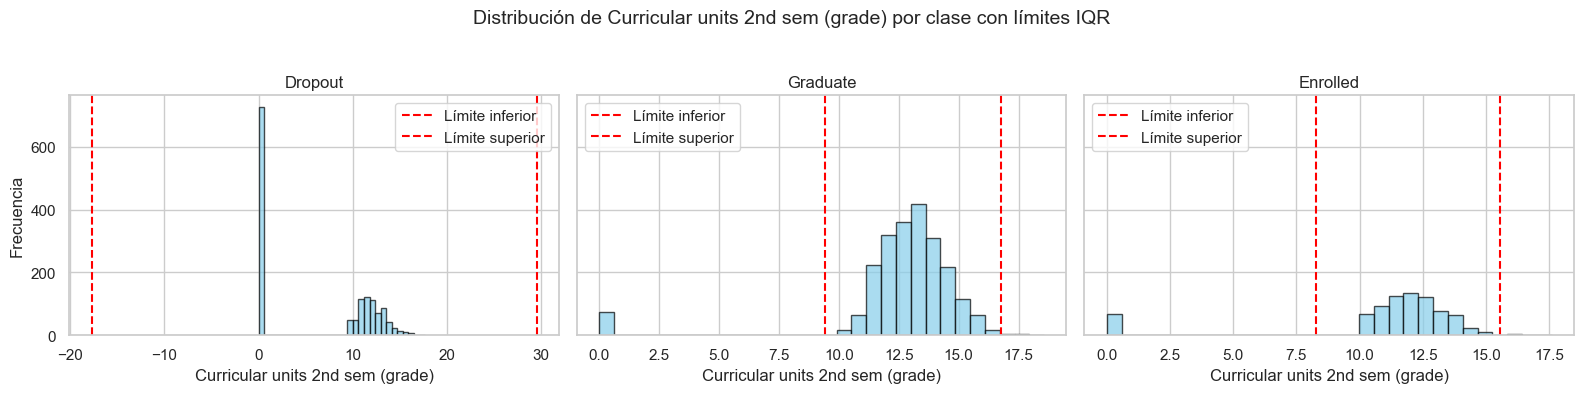

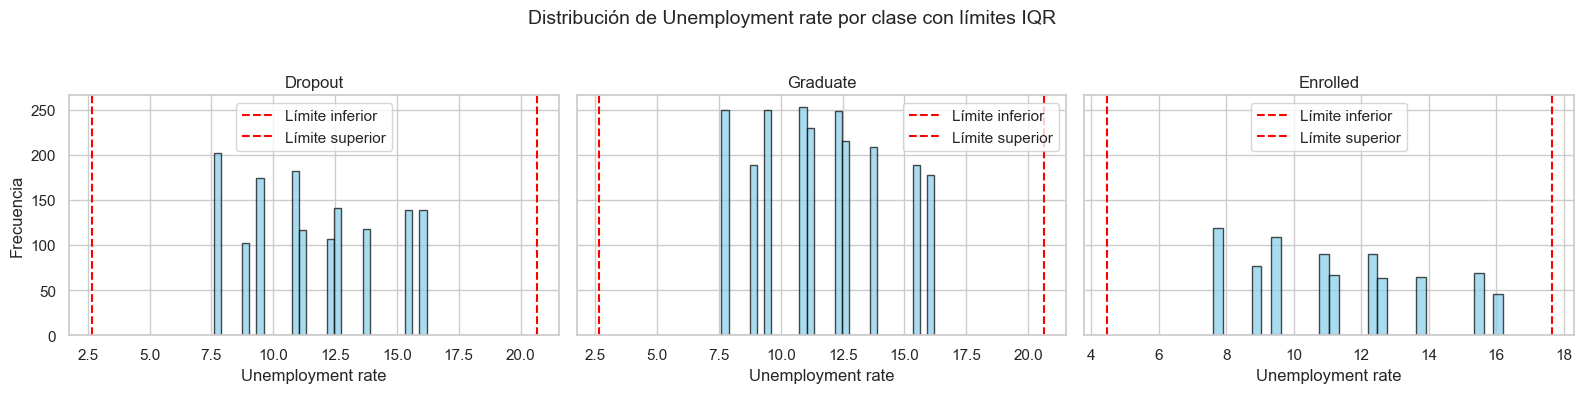

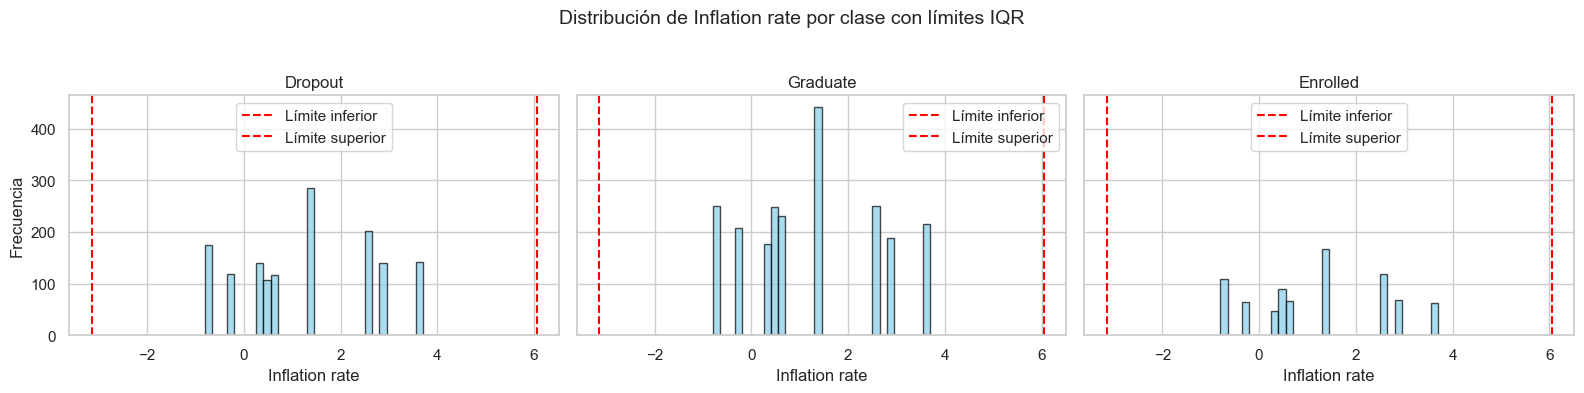

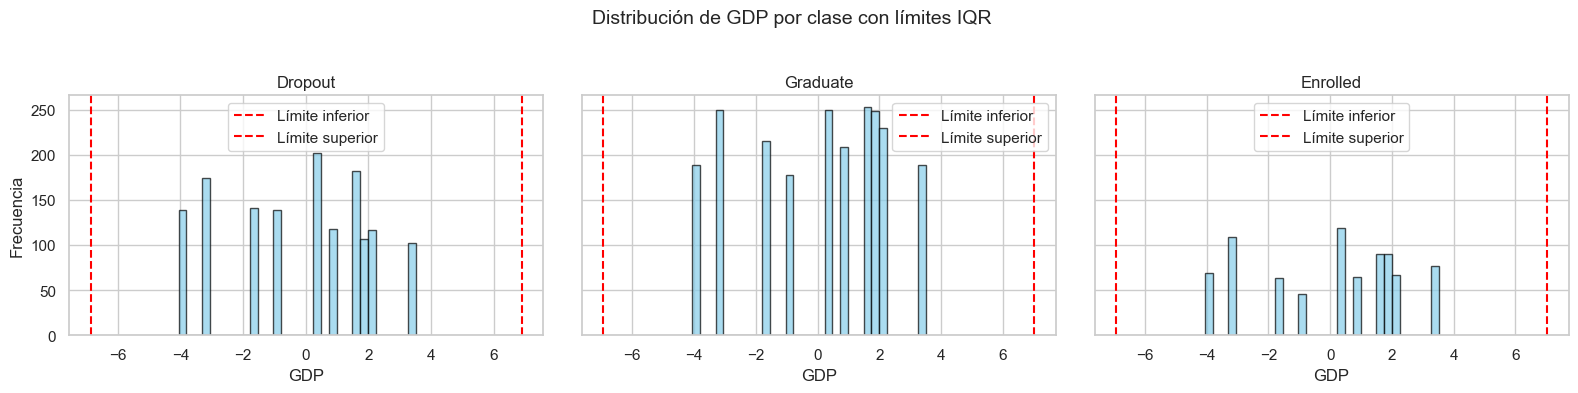

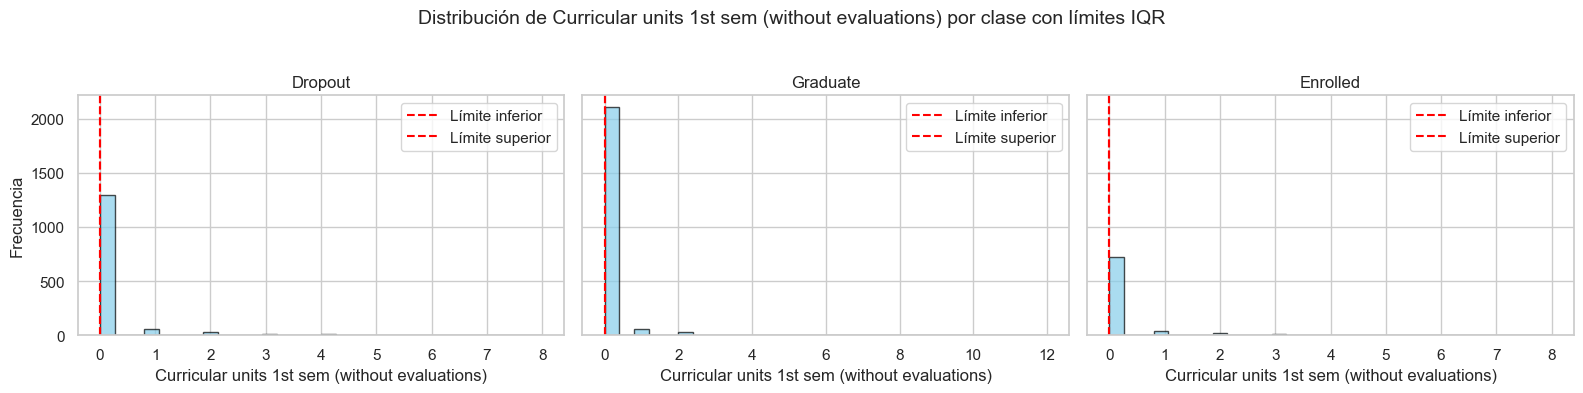

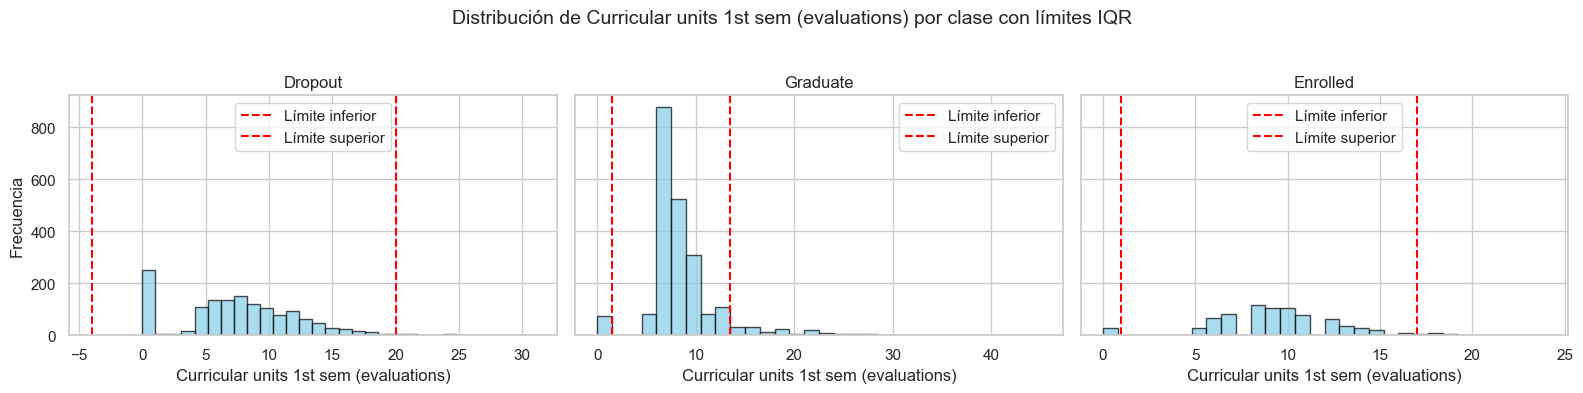

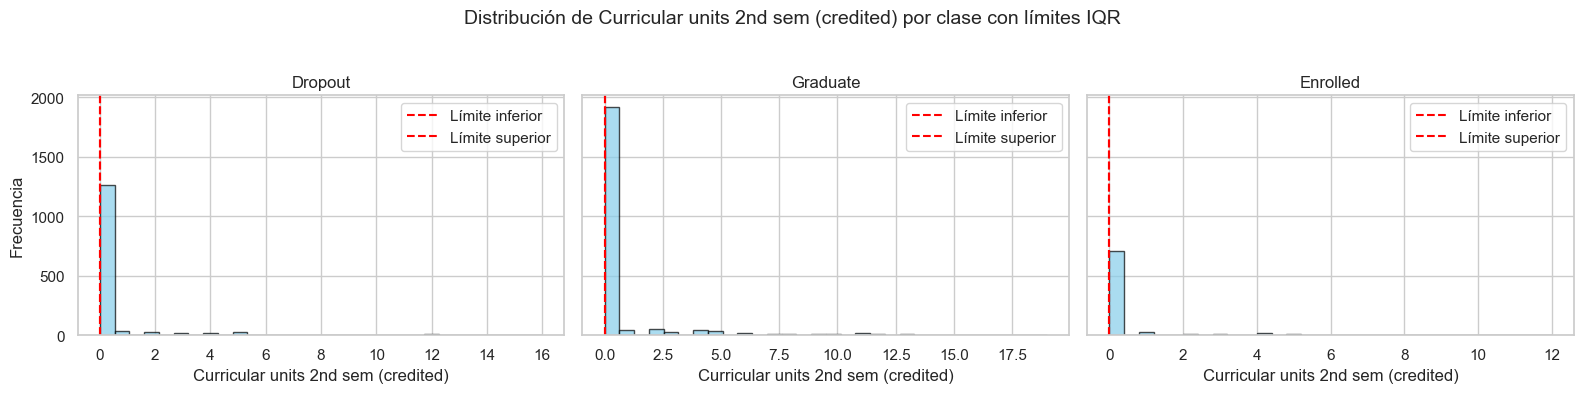

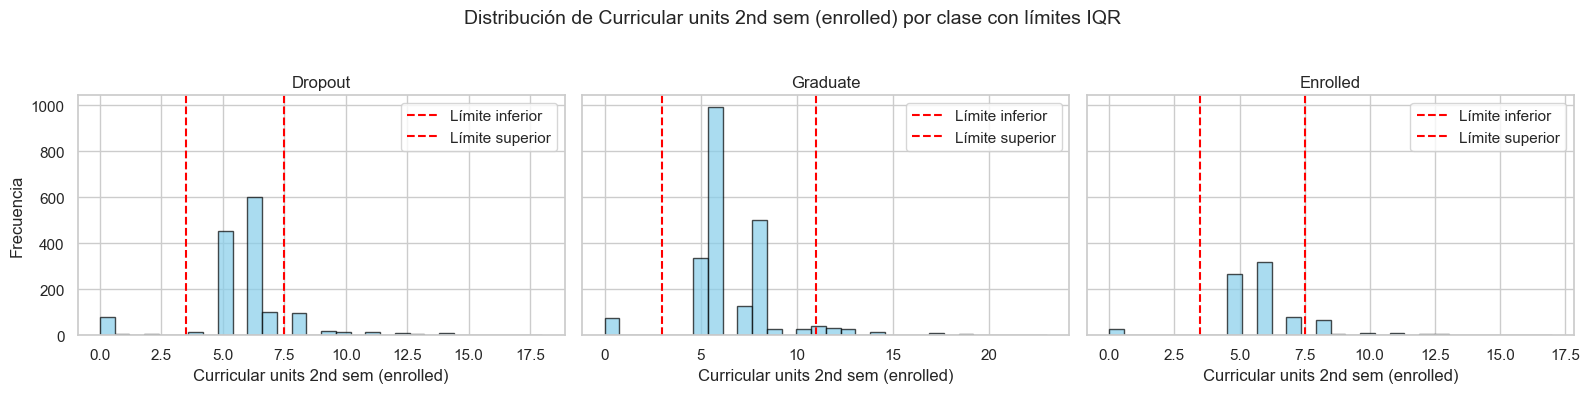

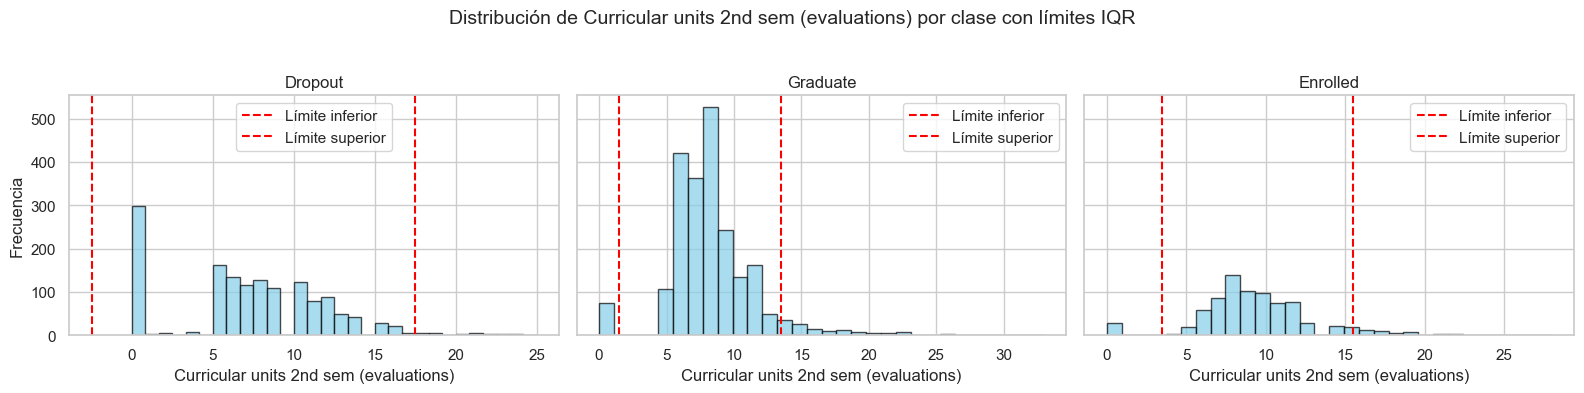

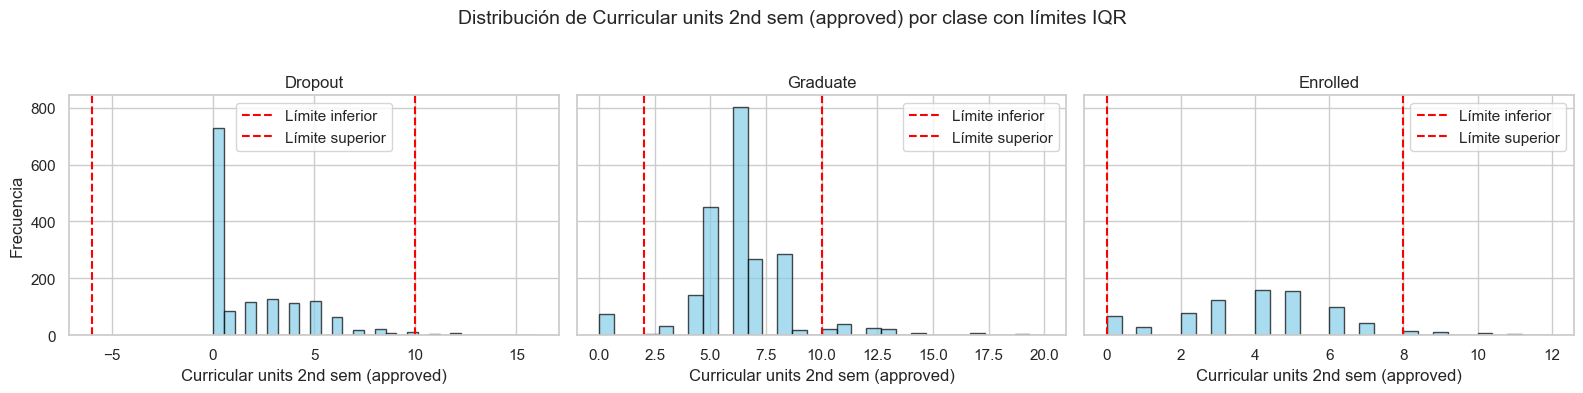

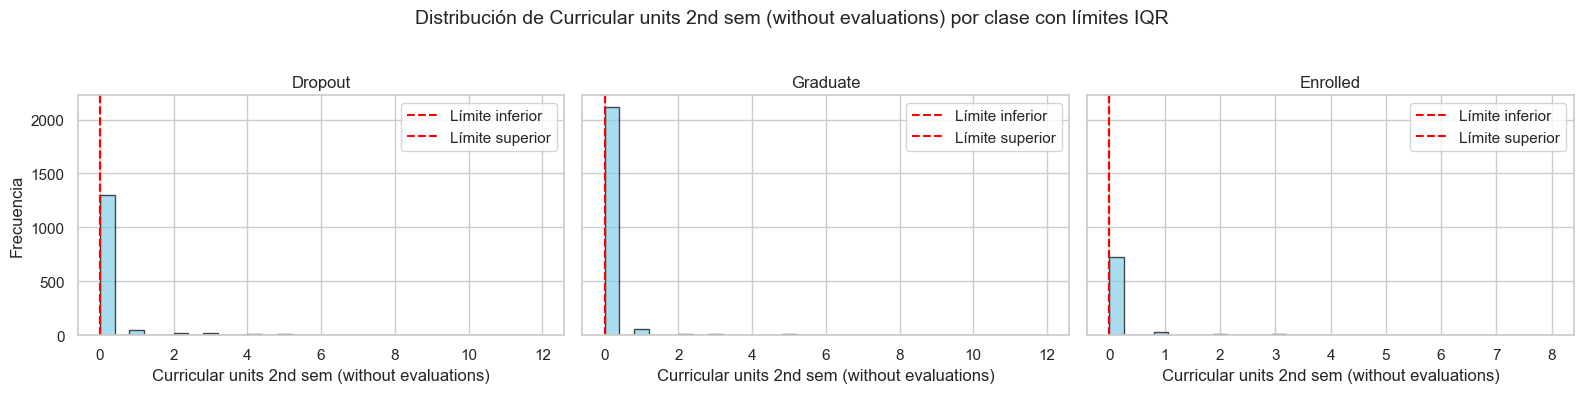

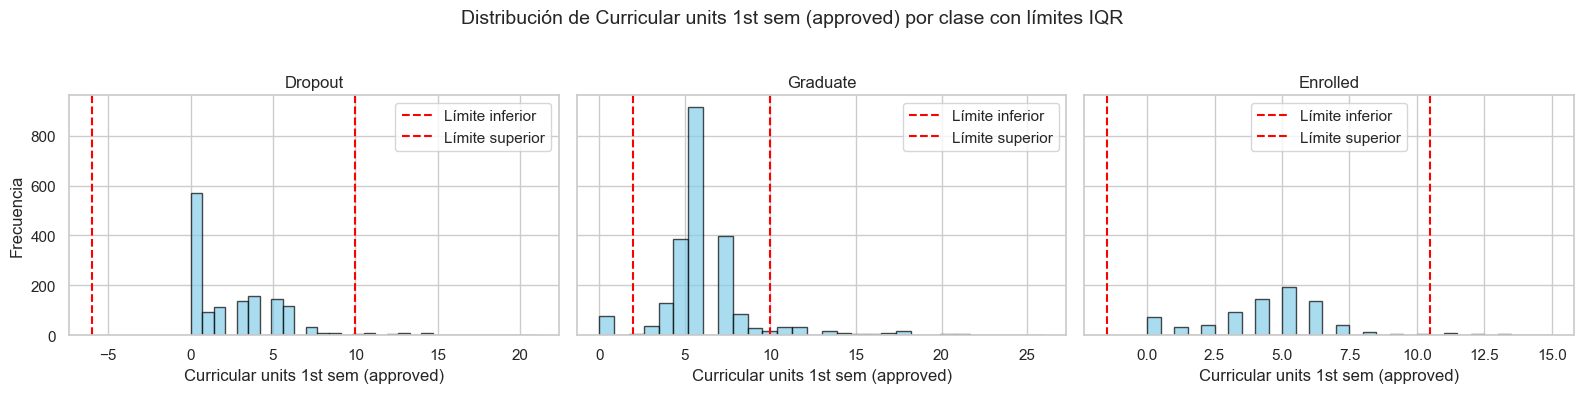

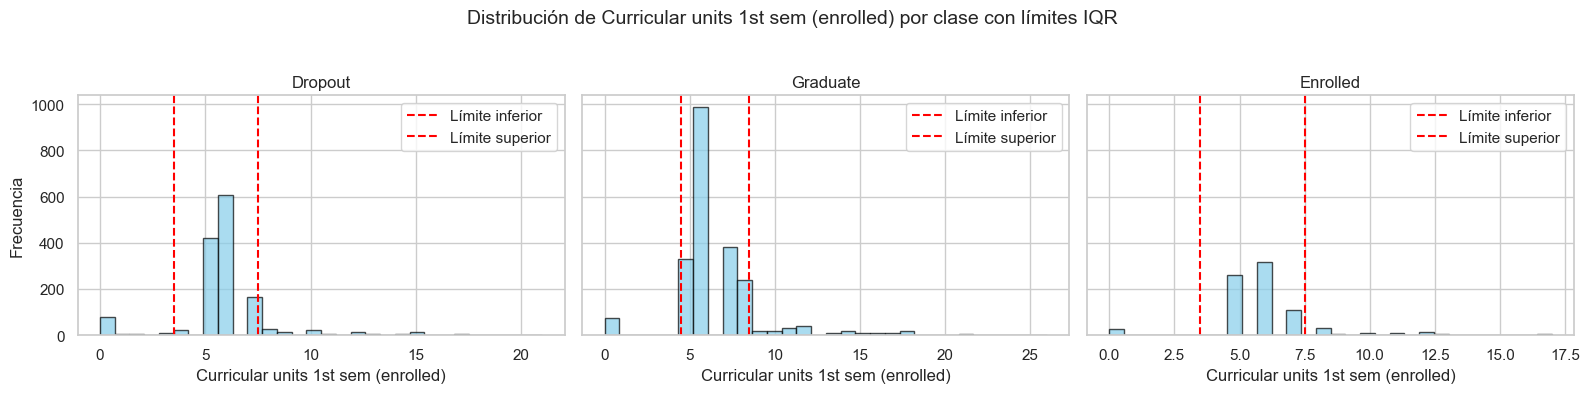

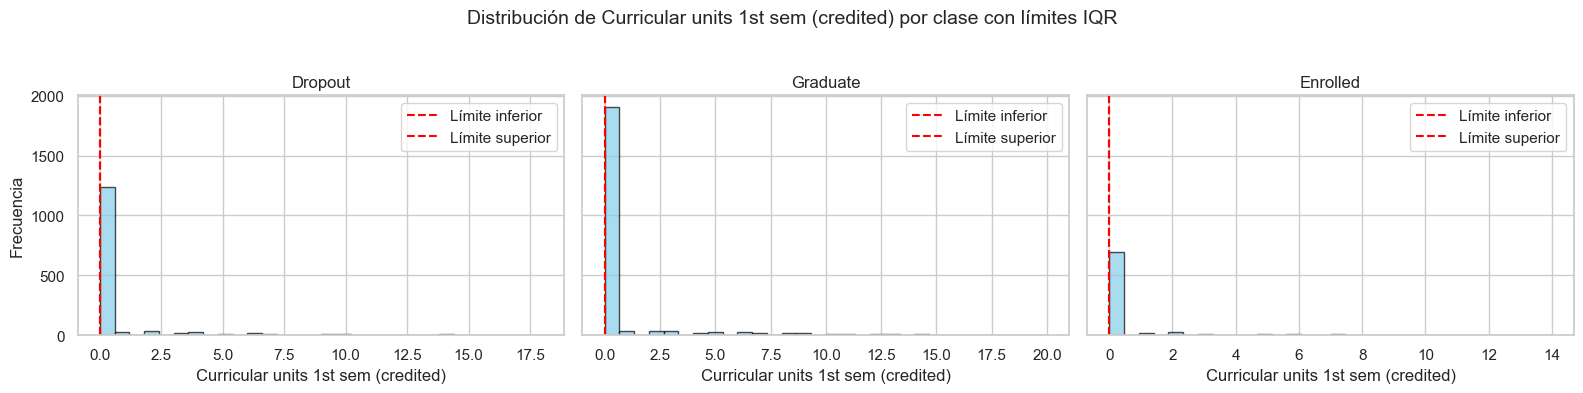

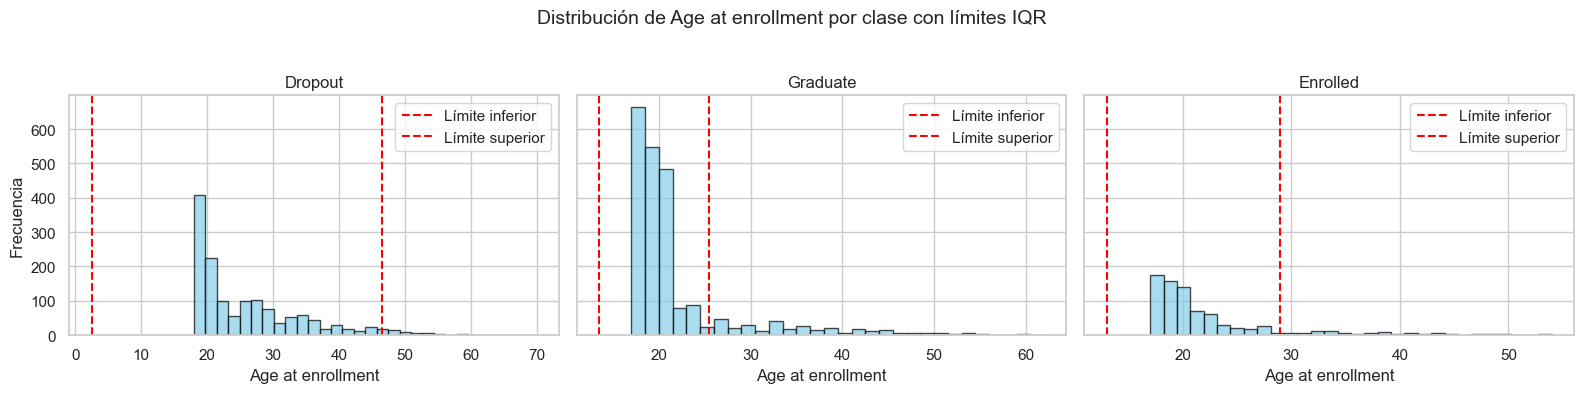

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols_to_plot = [
    'Previous qualification (grade)', 'Admission grade',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
    'Unemployment rate', 'Inflation rate', 'GDP',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (without evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (credited)',
    'Age at enrollment'
]

# Lista de clases
classes = df['Target'].unique()

for col in cols_to_plot:
    fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharey=True)
    
    for i, cls in enumerate(classes):
        data = df[df['Target'] == cls][col]
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        axes[i].hist(data, bins=30, alpha=0.7, edgecolor='black', color='skyblue')
        axes[i].axvline(lower, color='red', linestyle='--', label='Límite inferior')
        axes[i].axvline(upper, color='red', linestyle='--', label='Límite superior')
        axes[i].set_title(f'{cls}')
        axes[i].set_xlabel(col)
        if i == 0:
            axes[i].set_ylabel('Frecuencia')
        axes[i].legend()

    plt.suptitle(f'Distribución de {col} por clase con límites IQR', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    # save the figure in folder distribution
    plt.savefig(f'distribution/{col}_distribution.png')
    plt.show()


In [12]:
import plotly.express as px

for col in cols_to_plot:
    fig = px.box(df, x='Target', y=col, color='Target',
                 title=f'Boxplot interactivo de {col} por clase',
                 template='plotly_white')
    fig.show()


### 🎓 Admission grade
La distribución es asimétrica negativa: hay una concentración alrededor de 120–130, con cola hacia la derecha.

Los outliers por encima de 160 son pocos pero reales. Los estudiantes que se gradúan (Graduate) tienden a tener las notas de admisión más altas, con una mediana en torno a 130–135.

Los que abandonan (Dropout) presentan una distribución más baja, aunque con outliers hacia arriba.

Confirmamos que la nota de admisión es predictiva del éxito académico.


18
Importante para interpretación: edad como posible variable de riesgo.

### 📚 Curricular units sem (grade)
En ambos semestres, los Dropout presentan una distribución claramente sesgada hacia notas bajas, con muchos ceros.

Graduate tiene notas más altas y más concentradas, lo que indica consistencia académica.

Enrolled está intermedio, como es esperable.

Estos gráficos justifican que *no se eliminen los outliers*, ya que reflejan patrones significativos por clase. Además, respaldan la elección de ciertas variables para modelos interpretativos como regresión logística o árboles de decisión.

In [ ]:
df['Target'].value_counts(normalize=True)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0, annot=False)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


## Codificación de variables categóricas

In [ ]:
# Excluir columnas numéricas continuas
excluir = [
    'Target', 'Previous qualification (grade)', 'Admission grade',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
    'Unemployment rate', 'Inflation rate', 'GDP', 'Curricular units 1st sem (without evaluations)', 'Curricular units 1st sem (evaluations)'
    'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (without evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (credited)',
    'Age at enrollment', 'Curricular units 1st sem (evaluations)','Curricular units 2nd sem (credited)'
]

# Detectar columnas categóricas (int u object)
cat_cols = [col for col in df.columns if col not in excluir and df[col].dtype in ['int64', 'object']]

# Imprimir value_counts para cada columna categórica
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts().sort_index())


In [ ]:
# Binarias
for col in ['Gender', 'Scholarship holder', 'Debtor', 'Displaced', 'Educational special needs','Tuition fees up to date','International']:
    print(df[col].value_counts(normalize=True))



✅ Scholarship holder: ~25% de los estudiantes poseen beca. Variable interesante, ya que podría estar asociada con mayor retención académica o éxito por apoyo económico.

✅ Gender: Distribución razonablemente equilibrada (~65% vs ~35%). Se puede utilizar directamente sin transformación.

✅ Debtor: Solo ~11% de los estudiantes tienen deudas. Clase desbalanceada, pero potencialmente informativa. Podría correlacionarse con abandono (esto se explorará con los modelos).

⚠️ Educational special needs: Solo ~1.15% presenta necesidades educativas especiales. Dado el fuerte desbalance y poca variabilidad, no se considera relevante en el análisis.

⚠️ International: Solo ~2.5% son estudiantes internacionales. Aunque está bien codificada, su impacto es mínimo, por lo que no se considera relevante.

✅ Tuition fees up to date: Variable relevante por contexto económico. El 11.9% de los estudiantes no está al día con las tasas. Tiene potencial como predictor de abandono.

✅ Displaced: 45.2% de los estudiantes son desplazados. Aunque está balanceada, su importancia deberá validarse empíricamente en los modelos.

**Todas las variables binarias están codificadas como 0 y 1 y, por tanto, no requieren codificación adicional (como One-Hot Encoding).**

In [ ]:
# Eliminar international and educational special needs
df1 = df.drop(columns=['International', 'Educational special needs'])

### Variables categóricas no binarias

In [ ]:
# ver categóarad de maritual status
print(df1['Marital status'].value_counts())
# Marital Status	Feature	Integer	Marital Status	1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated
# porcentajes
print(df1['Marital status'].value_counts(normalize=True))

Clase Marial Status con poca cardinalidad pero muy desbalanceada. Se puede usar directamente: Agrupar categrías poco frecuentes en "Otros" y dejar las más comunes.




In [ ]:
df1['Marital status group'] = df1['Marital status'].replace({3: 0, 5: 0, 6: 0})
df1['Marital status group']. value_counts(normalize=True)

In [ ]:
# Aplicar one-hot encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
# Aplicar one-hot encoding a las columnas categóricas
enc_df = pd.DataFrame(enc.fit_transform(df1[['Marital status group']]).toarray())

# cambiar el nombre de las columnas
enc_df.columns = ['Other', 'Single', 'Married', 'Divorced']
# Concatenar el DataFrame original con el DataFrame codificado
df2 = pd.concat([df1, enc_df], axis=1)
# print(df2.head())
# Eliminar la columna original
df2 = df2.drop(columns=['Marital status group', 'Marital status'])

**Marital status** tiene 6 categorías codificadas como enteros. Dado que la distribución está fuertemente desbalanceada (el 89% son solteros), se aplicó una estrategia combinada:  
- Se agruparon las categorías menos frecuentes (`widower`, `facto union`, `legally separated`) como "otros"  
- Se aplicó One-Hot Encoding tras la agrupación para evitar columnas escasamente pobladas y preservar interpretabilidad.


In [ ]:
# Father occupation
# Paso 1: definir ocupaciones frecuentes (≥1% de los datos)
umbral = 0.01
frecuentes = df2['Father\'s occupation'].value_counts(normalize=True)
categorias_frecuentes = frecuentes[frecuentes >= umbral].index

# Paso 2: agrupar como "otros" (-1)
df2['Father\'s occupation grouped'] = df2['Father\'s occupation'].apply(
    lambda x: x if x in categorias_frecuentes else -1
)
# si categoria es 90, juntar con -1
df2['Father\'s occupation grouped'] = df2['Father\'s occupation grouped'].replace(90, -1)
# cuantos datos tiene cada categoria
print(df2['Father\'s occupation grouped'].value_counts(normalize=True))


In [ ]:
# one hot encoding
enc = OneHotEncoder()
# Aplicar one-hot encoding a las columnas categóricas
enc_df = pd.DataFrame(enc.fit_transform(df2[['Father\'s occupation grouped']]).toarray())
# cambiar el nombre de las columnas
father_occ_map = {
    -1: "Other",
    0: "Student",
    1: "Executives/Managers",
    2: "Scientific Specialists",
    3: "Technicians",
    4: "Admin Staff",
    5: "Services/Sellers",
    6: "Agriculture/Fisheries",
    7: "Skilled Industry",
    8: "Machine Operators",
    9: "Unskilled Workers",
    10: "Armed Forces",

}
enc_df.columns =['Father: Other', 'Father: Student', 'Father: Executives/Managers', 
            'Father: Scientific Specialists', 'Father: Technicians',
            'Father: Admin Staff', 'Father: Services/Sellers', 'Father: Agriculture/Fisheries',
            'Father: Skilled Industry', 'Father: Machine Operators',
            'Father: Unskilled Workers', 'Father: Armed Forces']
# Concatenar el DataFrame original con el DataFrame codificado
df3 = pd.concat([df2, enc_df], axis=1)
# Eliminar la columna original
df3 = df3.drop(columns=['Father\'s occupation', 'Father\'s occupation grouped'])
# ver los primeros 5 datos
print(df3.head())

In [ ]:
# Mother occupation
# Paso 1: definir ocupaciones frecuentes (por ejemplo, ≥1% de los datos)
umbral = 0.05
frecuentes = df3['Mother\'s occupation'].value_counts(normalize=True)
categorias_frecuentes = frecuentes[frecuentes >= umbral].index
# Paso 2: agrupar como "otros" (por ejemplo, código -1)
df3['Mother\'s occupation grouped'] = df['Mother\'s occupation'].apply(
    lambda x: x if x in categorias_frecuentes else -1
)
# cuantos datos tiene cada categoria
print(df3['Mother\'s occupation grouped'].value_counts(normalize=True))

In [ ]:
enc = OneHotEncoder()
# Aplicar one-hot encoding a las columnas categóricas
enc_df = pd.DataFrame(enc.fit_transform(df3[['Mother\'s occupation grouped']]).toarray())
# cambiar el nombre de las columnas
mother_occ_map = {
    -1: "Other",
    0: "Student",
    1: "Executives/Managers",
    2: "Scientific Specialists",
    3: "Technicians",
    4: "Admin Staff",
    5: "Services/Sellers",
    6: "Agriculture/Fisheries",
    7: "Skilled Industry",
    8: "Machine Operators",
    9: "Unskilled Workers",
    10: "Armed Forces",

}
enc_df.columns =['Mother: Other','Mother: Scientific Specialists', 'Mother: Technicians',
            'Mother: Admin Staff', 'Mother: Services/Sellers',
            'Mother: Skilled Industry','Mother: Unskilled Workers' ]
# Concatenar el DataFrame original con el DataFrame codificado
df4 = pd.concat([df3, enc_df], axis=1)
# Eliminar la columna original
df4 = df4.drop(columns=['Mother\'s occupation', 'Mother\'s occupation grouped'])
# ver los primeros 5 datos
print(df4.head())

In [ ]:
# Aplicaction mode
# Paso 1: definir modos de aplicación frecuentes (por ejemplo, ≥1% de los datos)
umbral = 0.01
frecuentes = df4['Application mode'].value_counts(normalize=True)
categorias_frecuentes = frecuentes[frecuentes >= umbral].index
# Paso 2: agrupar como "otros" (por ejemplo, código -1)
df4['Application mode grouped'] = df4['Application mode'].apply(
    lambda x: x if x in categorias_frecuentes else -1
)

# cuantos datos tiene cada categoria
print(df4['Application mode grouped'].value_counts(normalize=True))
enc = OneHotEncoder()
# Aplicar one-hot encoding a las columnas categóricasç
enc_df = pd.DataFrame(enc.fit_transform(df4[['Application mode grouped']]).toarray())
# -1, 1,7,17,18, 39,42, 43, 44, 51
# cambiar el nombre de las columnas
enc_df.columns = ['Application mode: Other', 'Application mode: 1', 'Application mode: 7',
                  'Application mode: 17', 'Application mode: 18', 'Application mode: 39',
                  'Application mode: 42', 'Application mode: 43', 'Application mode: 44',
                  'Application mode: 51']

# Concatenar el DataFrame original con el DataFrame codificado
df5 = pd.concat([df4, enc_df], axis=1)

# Eliminar la columna original
df5 = df5.drop(columns=['Application mode', 'Application mode grouped'])
# ver los primeros 5 datos
print(df5.head())

**aplicaction ordern no se aplica one-hot, ya que se pierde la secuencia de aplicación**

In [ ]:
# nationality: ponerlo como binario si es national o es extranjero
# Crear variable binaria
df5['Is_foreign'] = df['Nacionality'].apply(lambda x: 0 if x == 1 else 1)
# Eliminar la columna original
df5 = df5.drop(columns=['Nacionality'])
df5['Is_foreign'].value_counts(normalize=True)

**nationatity e international miden los mismo, y ahora con que nationality es binario, es tiene los mismo valores**

In [ ]:
# Course: no se debería utilizar como numeros, ya que son codigos de asinaturas
umbral = 0.01
frecuentes = df5['Course'].value_counts(normalize=True)
categorias_frecuentes = frecuentes[frecuentes >= umbral].index

# Paso 2: agrupar como "otros" (por ejemplo, código -1)
df5['Course grouped'] = df5['Course'].apply(
    lambda x: x if x in categorias_frecuentes else -1
)
# cuantos datos tiene cada categoria
print(df5['Course grouped'].value_counts(normalize=True))

enc = OneHotEncoder()
# Aplicar one-hot encoding a las columnas categóricas
enc_df = pd.DataFrame(enc.fit_transform(df5[['Course grouped']]).toarray())
# cambiar el nombre de las columnas
enc_df.columns = ['Course: 33', 'Course: 171', 'Course: 8014', 'Course: 9003', 'Course: 9070',
                  'Course: 9085', 'Course: 9119', 'Course: 9130', 'Course: 9147', 'Course: 9238',
                  'Course: 9254','Course: 9500', 'Course: 9556', 'Course: 9670', 'Course: 9773 ', 'Course: 9853',
                  'Course: 9991']

# Concatenar el DataFrame original con el DataFrame codificado
df6 = pd.concat([df5, enc_df], axis=1)
# Eliminar la columna original
df6 = df6.drop(columns=['Course', 'Course grouped'])
# ver los primeros 5 datos
print(df6.head())




In [ ]:
# previous qualification
umbral = 0.01
frecuentes = df6['Previous qualification'].value_counts(normalize=True)
categorias_frecuentes = frecuentes[frecuentes >= umbral].index
# Paso 2: agrupar como "otros" (por ejemplo, código -1)
df6['Previous qualification grouped'] = df6['Previous qualification'].apply(
    lambda x: x if x in categorias_frecuentes else -1
)
# unir 12 con -1, ya que 12 es other
df6['Previous qualification grouped'] = df6['Previous qualification grouped'].replace(12, -1)
# cuantos datos tiene cada categoria
print(df6['Previous qualification grouped'].value_counts(normalize=True))

enc = OneHotEncoder()
# Aplicar one-hot encoding a las columnas categóricas
enc_df = pd.DataFrame(enc.fit_transform(df6[['Previous qualification grouped']]).toarray())
enc_df[2].value_counts()

# cambiar el nombre de las columnas
enc_df.columns = ['Previous qualification: Others', 'Previous qualification: Secondary education', 'Previous qualification: Higher education',
                  'Previous qualification: Basic education 3rd cycle', 'Previous qualification: Technological specialization course']
# Concatenar el DataFrame original con el DataFrame codificado
df7 = pd.concat([df6, enc_df], axis=1)
# Eliminar la columna original
df7 = df7.drop(columns=['Previous qualification', 'Previous qualification grouped'])
# ver los primeros 5 datos
print(df7.head())


In [ ]:
# Mother's qualification
umbral = 0.01
frecuentes = df7['Mother\'s qualification'].value_counts(normalize=True)
categorias_frecuentes = frecuentes[frecuentes >= umbral].index
# Paso 2: agrupar como "otros" (por ejemplo, código -1)
df7['Mother\'s qualification grouped'] = df7['Mother\'s qualification'].apply(
    lambda x: x if x in categorias_frecuentes else -1
)
# unir 12 con -1, ya que 12 es other
df7['Mother\'s qualification grouped'] = df7['Mother\'s qualification grouped'].replace(12, -1)
# unir 34 con -1, ya que 34 es unknown
df7['Mother\'s qualification grouped'] = df7['Mother\'s qualification grouped'].replace(34, -1)

# unir 3 con 4 ya ambas son higher education
df7['Mother\'s qualification grouped'] = df7['Mother\'s qualification grouped'].replace(3, 4)

# unir 2 con 4 ya ambas son higher education
df7['Mother\'s qualification grouped'] = df7['Mother\'s qualification grouped'].replace(2, 4)

# cuantos datos tiene cada categoria
print(df7['Mother\'s qualification grouped'].value_counts(normalize=True))

enc = OneHotEncoder()
# Aplicar one-hot encoding a las columnas categóricas
enc_df = pd.DataFrame(enc.fit_transform(df7[['Mother\'s qualification grouped']]).toarray())
# cambiar el nombre de las columnas
enc_df.columns = ['Mother\'s qualification: Others', 
                    'Mother\'s qualification: Secondary education', 

                    'Mother\'s qualification: Higher education',
                    'Mother\'s qualification: Basic education 3rd cycle',
                    'Mother\'s qualification: Basic education 1st cycle ', 
                    'Mother\'s qualification: Basic Education 2nd Cycle']
# Concatenar el DataFrame original con el DataFrame codificado
df8 = pd.concat([df7, enc_df], axis=1)
# Eliminar la columna original
df8 = df8.drop(columns=['Mother\'s qualification', 'Mother\'s qualification grouped'])
# ver los primeros 5 datos
print(df8.head())

In [ ]:
# Father's qualification
umbral = 0.01
frecuentes = df8['Father\'s qualification'].value_counts(normalize=True)
categorias_frecuentes = frecuentes[frecuentes >= umbral].index
# Paso 2: agrupar como "otros" (por ejemplo, código -1)
df8['Father\'s qualification grouped'] = df8['Father\'s qualification'].apply(
    lambda x: x if x in categorias_frecuentes else -1
)
# unir 12 con -1, ya que 12 es other
df8['Father\'s qualification grouped'] = df8['Father\'s qualification grouped'].replace(12, -1)
# unir 34 con -1, ya que 34 es unknown
df8['Father\'s qualification grouped'] = df8['Father\'s qualification grouped'].replace(34, -1)
# unir 3 con 4 ya ambas son higher education
df8['Father\'s qualification grouped'] = df8['Father\'s qualification grouped'].replace(3, 4)
# unir 2 con 4 ya ambas son higher education
df8['Father\'s qualification grouped'] = df8['Father\'s qualification grouped'].replace(2, 4)

# cuantos datos tiene cada categoria
print(df8['Father\'s qualification grouped'].value_counts(normalize=True))

enc = OneHotEncoder()
# Aplicar one-hot encoding a las columnas categóricas
enc_df = pd.DataFrame(enc.fit_transform(df8[['Father\'s qualification grouped']]).toarray())

# cambiar el nombre de las columnas
enc_df.columns = ['Father\'s qualification: Others', 
                    'Father\'s qualification: Secondary education', 
                    'Father\'s qualification: Higher education',
                    'Father\'s qualification: Basic education 3rd cycle',
                    'Father\'s qualification: Basic education 1st cycle ', 
                    'Father\'s qualification: Basic Education 2nd Cycle']
# Concatenar el DataFrame original con el DataFrame codificado
df9 = pd.concat([df8, enc_df], axis=1)
# Eliminar la columna original
df9 = df9.drop(columns=['Father\'s qualification', 'Father\'s qualification grouped'])
# ver los primeros 5 datos
print(df9.head())

## Aplicacion de SMOTE
Se aplicó SMOTE para balancear las clases de la variable `dropout`.
Se generaron 1,000 muestras sintéticas para la clase minoritaria (Dropout) y se aplicó a las variables numéricas y categóricas.
Se utilizó el método `SMOTE` de la biblioteca `imblearn` para crear las muestras sintéticas.
.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

le = LabelEncoder()
X_encoded = df9.drop(columns=['Target'])
y_multi = le.fit_transform(df9['Target'])  # Dropout=0, Enrolled=1, Graduate=2 (por ejemplo)


sm = SMOTE(sampling_strategy={0: 2200, 1: 2000, 2: 2500}, random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_encoded, y_multi)


In [ ]:
import pandas as pd
pd.Series(y_resampled).value_counts()

In [ ]:
# guardar el dataset
df_resampled = pd.DataFrame(X_resampled, columns=X_encoded.columns)
df_resampled['Target'] = y_resampled
df_resampled.to_csv('data_resampled.csv', index=False)
print("Dataset resampled saved as 'data_resampled.csv'")

In [ ]:
# abrir el dataset
df_resampled = pd.read_csv('data_resampled.csv')
#print(df_resampled.head())
df_resampled.columns
df_resampled['Target'].value_counts(normalize=True)

## ✅ Checklist de Análisis Exploratorio y Preprocesamiento
 Carga de datos y revisión de tipos
Todos los campos correctamente tipados (int64, float64, object).

**✅Comprobación de valores nulos**
No hay valores faltantes en ninguna columna.

**✅Detección de duplicados**
Confirmado que no existen filas duplicadas.

**✅Identificación de outliers por cuartiles**
Detectados y visualizados con boxplots. No se eliminan si representan casos reales.

**✅Visualización de variables numéricas**
Histogramas + boxplots para cada variable clave.

**✅Visualización por clase en Target**
Boxplots comparativos entre Dropout, Graduate, Enrolled.

**✅Distribución de clases en Target**
Leve desbalance: se aplicará SMOTE (49.9% Graduate, 32.1% Dropout, 17.9% Enrolled).

**✅Matriz de correlación**
Detectada alta correlación entre variables académicas. Se tendrá en cuenta para evitar redundancia.

**✅Codificación de categóricas binarias**
Gender, Scholarship holder, Debtor están bien codificadas como 0/1.

**✅Codificación de variables categóricas no binarias**
Pendiente decidir si aplicar One-Hot o Label Encoding en columnas como Course, Nacionality, etc.

**❌Normalización / escalado**
Pendiente aplicar Z-score o MinMax según variable y modelo.

**❌Separación de features y target**
Pendiente definir X (atributos) y y (Target_encoded), con train/test split. En cada modelo

**❌Aplicación de SMOTE**
Pendiente generar el nuevo conjunto de entrenamiento equilibrado.



